# Import and warehouse data:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1= pd.read_csv("Part2 - Data1.csv")
print(df_1.shape)
df_1.head()

(5000, 8)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
df_2= pd.read_csv("Part2 -Data2.csv")
print(df_2.shape)
df_2.head()

(5000, 7)


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [4]:
df=df_1.merge(df_2,how='inner',on='ID',left_index=True )

In [5]:
print(df.shape)
df.head()

(5000, 14)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


# Data cleansing:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [7]:
#Null checking in the dataset 
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [8]:
df["LoanOnCard"].fillna(0.0, inplace = True)

In [9]:
df.dropna()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


# Data analysis & visualisation:

In [10]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage'>

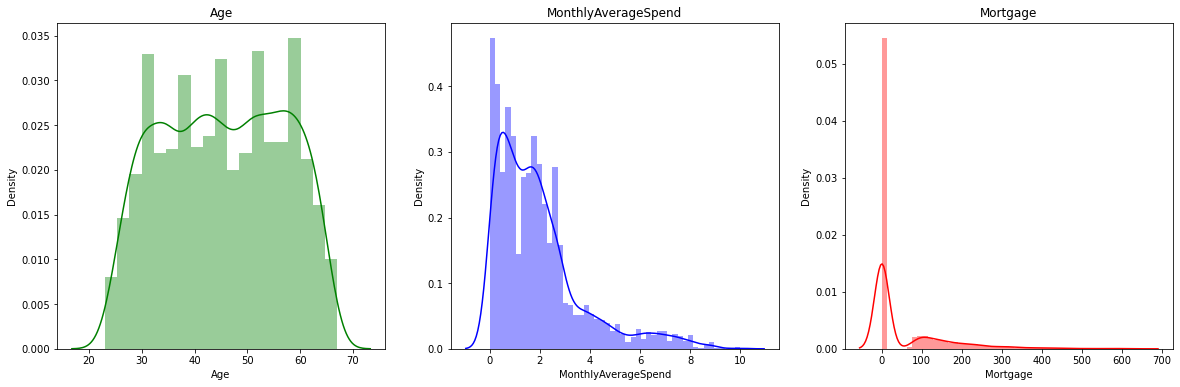

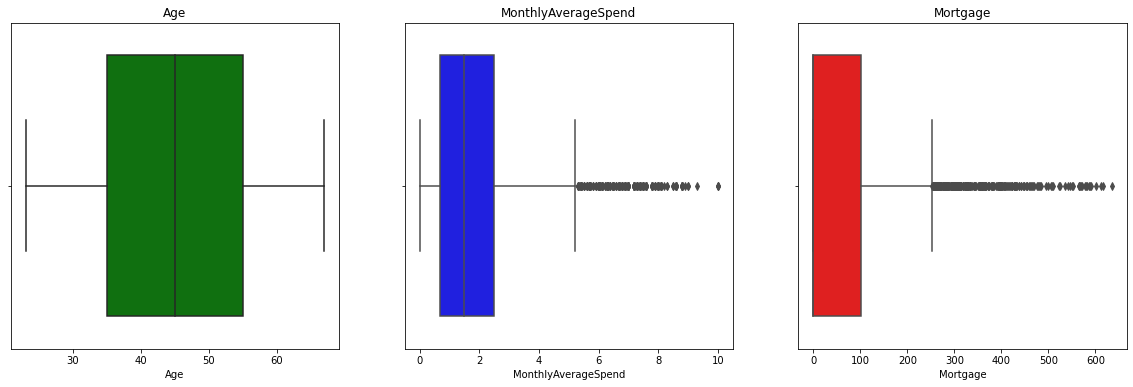

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.distplot(df['Age'],color='green')

plt.subplot(1,3,2)
plt.title('MonthlyAverageSpend')
sns.distplot(df['MonthlyAverageSpend'],color='blue')

plt.subplot(1,3,3)
plt.title('Mortgage')
sns.distplot(df['Mortgage'],color='red')

#
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.boxplot(df['Age'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('MonthlyAverageSpend')
sns.boxplot(df['MonthlyAverageSpend'],orient='vertical',color='blue')

plt.subplot(1,3,3)
plt.title('Mortgage')
sns.boxplot(df['Mortgage'],orient='vertical',color='red')


In [12]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


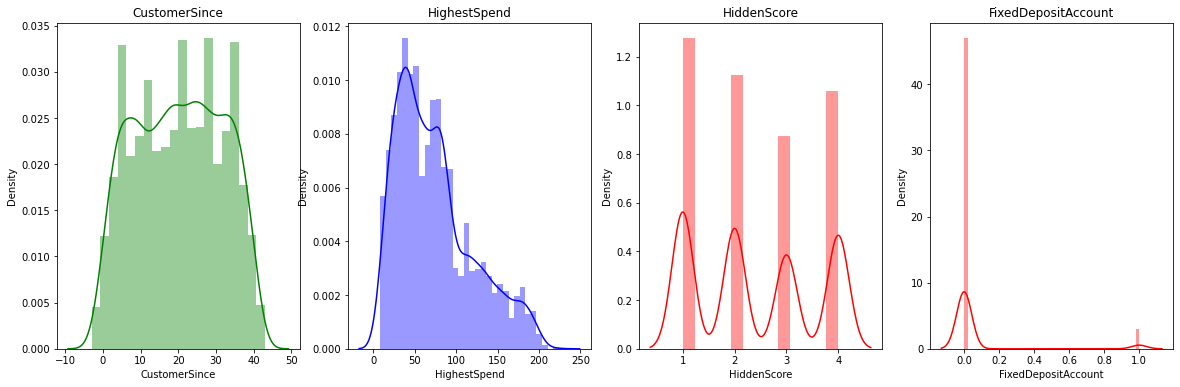

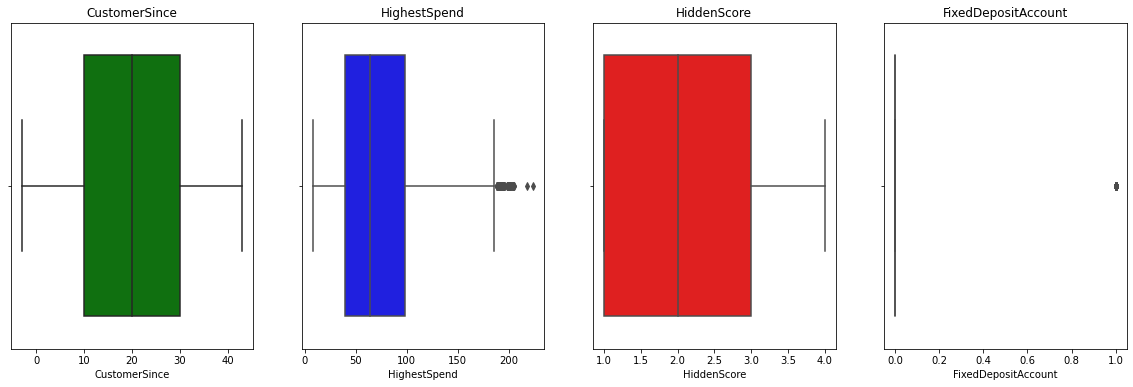

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('CustomerSince')
sns.distplot(df['CustomerSince'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('HighestSpend')
sns.distplot(df['HighestSpend'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HiddenScore')
sns.distplot(df['HiddenScore'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('FixedDepositAccount')
sns.distplot(df['FixedDepositAccount'],color='red')


plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('CustomerSince')
sns.boxplot(df['CustomerSince'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('HighestSpend')
sns.boxplot(df['HighestSpend'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HiddenScore')
sns.boxplot(df['HiddenScore'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('FixedDepositAccount')
sns.boxplot(df['FixedDepositAccount'],orient='vertical',color='red')


plt.show()

<AxesSubplot:title={'center':'FixedDepositAccount'}, xlabel='FixedDepositAccount', ylabel='count'>

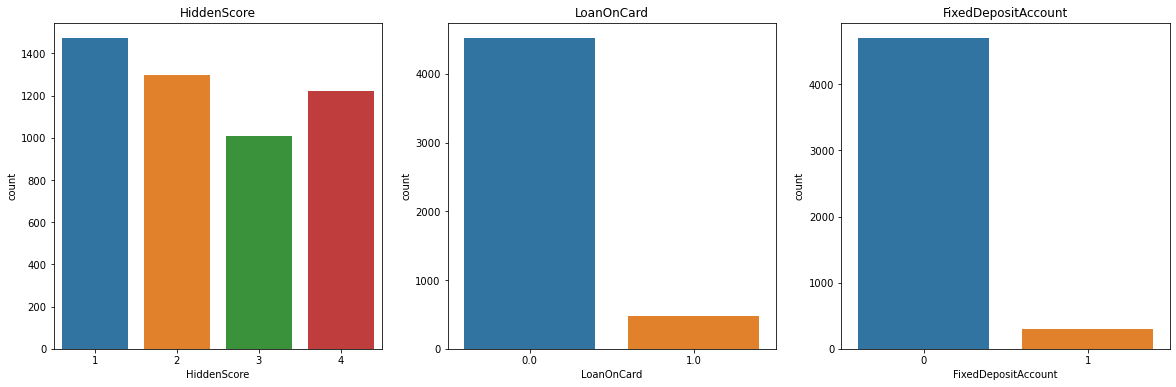

In [14]:

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('HiddenScore')
sns.countplot(data = df, x= 'HiddenScore') 

# subplot 2
plt.subplot(1, 3, 2)
plt.title('LoanOnCard')
sns.countplot(data = df, x= 'LoanOnCard') 

# subplot 3
plt.subplot(1, 3, 3)
plt.title('FixedDepositAccount')
sns.countplot(data = df, x= 'FixedDepositAccount') 


In [15]:
rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
CustomerSince,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
HighestSpend,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZipCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
HiddenScore,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
MonthlyAverageSpend,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Level,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Security,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


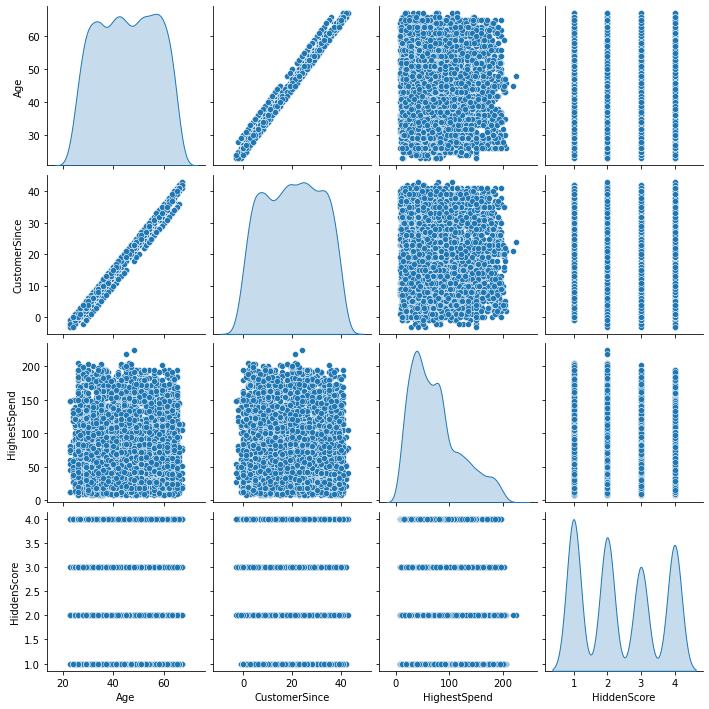

In [16]:
df_attr = df.iloc[:, [1,2,3,5]]
sns.pairplot(df_attr, diag_kind='kde')

#df_attr

In [17]:
# lets build our linear model
# independant variables
X = df.drop(['ID','ZipCode'], axis=1)
# the dependent variable
y = df[['LoanOnCard']]

In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.03,random_state=1)

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [20]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -1.1163117864489416e-16
The coefficient for CustomerSince is -1.321674474260801e-16
The coefficient for HighestSpend is -6.133648565474552e-18
The coefficient for HiddenScore is -2.464325430602072e-16
The coefficient for MonthlyAverageSpend is 7.758895387486792e-17
The coefficient for Level is 6.391588647116676e-17
The coefficient for Mortgage is -5.861007115686999e-20
The coefficient for Security is -2.9243834669035446e-16
The coefficient for FixedDepositAccount is 4.489264893675122e-17
The coefficient for InternetBanking is 7.310258618869867e-18
The coefficient for CreditCard is -4.67904156362092e-17
The coefficient for LoanOnCard is 1.0000000000000002


In [21]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 8.520961713998076e-15


In [22]:
regression_model.score(X_train, y_train)

1.0

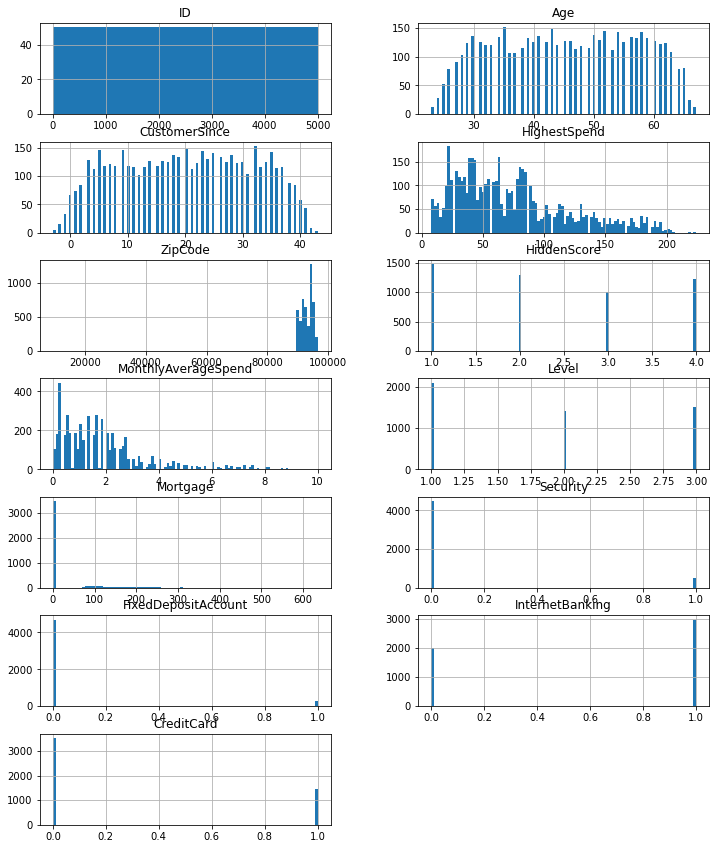

In [23]:
#Naive Bayes 

columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [24]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
fin_model = GaussianNB()

fin_model.fit(X_train, y_train)

GaussianNB()

In [25]:
fin_train_predict = fin_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, fin_train_predict)))
print()

Model Accuracy: 1.0000



In [26]:
fin_test_predict = fin_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, fin_test_predict)))
print()

Model Accuracy: 1.0000



In [27]:
print("Classification Report")
print(metrics.classification_report(y_test, fin_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           0       1.00      1.00      1.00       139

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [28]:
modelLR = LogisticRegression(C = 0.1, solver = 'liblinear')

#fitting the model
modelLR.fit(X_train, y_train)

#predicting
y_predictLR = modelLR.predict(X_test)

GaussianNB()

Accuracy Score of Training Data:  1.0

Accuracy Score of Test Data:  1.0

Classification Report of Naive Bayes Model:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       139
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Mean Absolute Error of Naive Bayes:
 0.0

Confusion Matrix of Naive Bayes Model:
  [[139   0]
 [  0  11]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

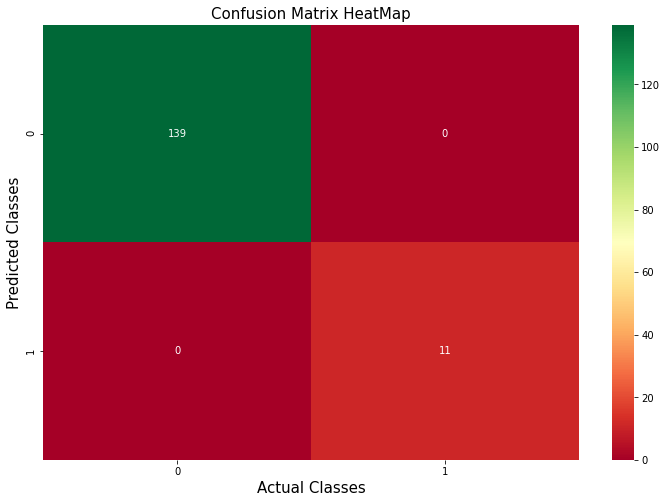

In [29]:
model_NB = GaussianNB()

#fitting the model
model_NB.fit(X_train, y_train)
print(model_NB)

# make predictions
y_predictNB = model_NB.predict(X_test)

#evaluate the accuracy
print('\nAccuracy Score of Training Data: ', model_NB.score(X_train, y_train))
modelNB_score = accuracy_score(y_test, y_predictNB)
print('\nAccuracy Score of Test Data: ', modelNB_score)

cfm_NB = confusion_matrix(y_test, y_predictNB)

# summarize the fit of the model
print('\nClassification Report of Naive Bayes Model:\n ', classification_report(y_test, y_predictNB))
print('\nMean Absolute Error of Naive Bayes:\n', mean_absolute_error(y_test, y_predictNB))
print('\nConfusion Matrix of Naive Bayes Model:\n ', cfm_NB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(cfm_NB, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

# Conclusion and improvisation:


The Accuracy score of Training and Test Data is equal which can signify too much accuracy in the model and dataset. But it can also signify lack of data and less volume of data.

quality: Quality of dataset was good, as number of outliers were less and null values were minimum.

quantity:Quantity of data can be increased to improve the optimisation of model.

variety:Improvement in variety of data can increase the implimentation of the presented model.This was major factor responsible for this case's decline in significane. If more data with more variety have been provided then the model can be trusted better.
